<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10314 non-null  object
 1   Category  10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


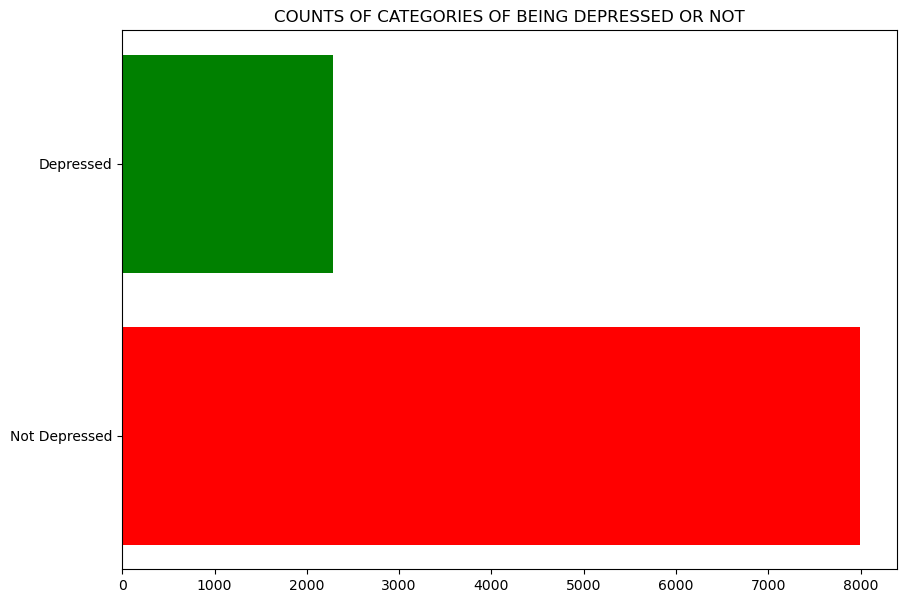

Note: you may need to restart the kernel to use updated packages.


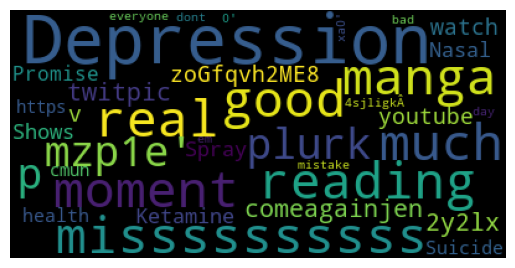

<Figure size 4000x4000 with 0 Axes>

In [3]:
%run "C:\Users\AM3855\Desktop\Twitter_1.ipynb"

In [4]:
# INSTALLING PACKAGES FOR PREPROCESSING

%pip install textacy
%pip install nltk

     -------------------------------------- 210.7/210.7 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 239.6/239.6 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 12.2/12.2 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 480.9/480.9 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packag

In [5]:
# IMPORT OTHER TEXT PREPROCESSING LIBRARIES

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from textacy import preprocessing

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AM3855\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AM3855\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AM3855\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AM3855\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# SHUFFLING OUR DATASET SINCE IT IS IS UNSHUFFLED AND FIRST 8000 ROWS BELONGED TO A CERTAIN CATEGORY

data = data.sample(frac=1)

In [7]:
# CONVERTING TEXT TO LOWER CASE

data["Text"] = data["Text"].str.lower()

In [8]:
# REMOVING THE STOPWORDS

stop = stopwords.words('english')

data["Text"] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [9]:
# REMOVING PUNCTUATION, EXTRA WHITESPACES AND HASHTAGS

preprocess = preprocessing.make_pipeline(
    preprocessing.remove.punctuation,
    preprocessing.normalize.whitespace,
    preprocessing.replace.hashtags,
)

data["Text"] = data["Text"].apply(preprocess)

In [10]:
# STEMMING THE WORDS

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
data['Text'] = data['Text'].apply(lambda x: stemmer.stem(x))

In [11]:
# REVIEW THE DATA AFTER TEXT PREPROCESSING

data.head()

,Text,Category
5558,so take next msg personal ur name mention caus...,0
894,enrique iglesias denmark woooaw coool b,0
10071,anxiety keeps awake antsy depression makes unm...,1
1847,mommyto6kids omg that s crazy weath,0
6539,cynthiaburoughs hugs bk,0


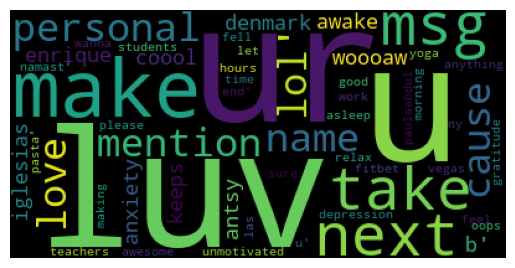

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [12]:
# CREATING WORDCLOUD TO SEE MOST OCCURING WORDS AFTER PREPROCESSING

TEXT_AFTER_PREPROCESS = data['Text'].values 

wordcloud = WordCloud().generate(str(TEXT_AFTER_PREPROCESS))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None) 

In [13]:
# IMPORTING LIBRARY TO IMPLEMENT TF-IDF ALGORITHM

from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
#CREATING CORPUS OF OUR WORDS

corpus = data['Text'].tolist()

In [15]:
# PRINTING NO. OF WORDS OF OUR CORPUS

print("Total no. of words in our corpus are:", len(corpus),'\n')

Total no. of words in our corpus are: 10283 



In [16]:
# FITTING VECTORIZER TO OUR DATA

vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

TfidfVectorizer()

In [17]:
# TRANSFORMING OUR DATA

Text_tf = vectorizer.transform(data['Text']).toarray()

In [18]:
# GETTING TOP 5 WORDS WITH HIGHEST TF-IDF SCORES

feature_array = np.array(vectorizer.get_feature_names_out())
tfidf_sorting = np.argsort(Text_tf).flatten()[::-1]

n = 5
top_n = feature_array[tfidf_sorting][:n]
print("The 5 most important words are", top_n, '\n')

The 5 most important words are ['pasta' 'oops' 'fell' 'asleep' 'hours'] 



In [19]:
# GETTING WORDS WITH THE LEAST TF-IDF SCORES

bottom_n = feature_array[tfidf_sorting][-n:]
print(" The 5 least important words having lowest tf-idf scores are", bottom_n)
print('\n')

 The 5 least important words having lowest tf-idf scores are ['part' 'partayyyi' 'parti' 'participants' '00']




In [20]:
# REVIEW ONE OF THE VECTORIZED SENTENCE

Text_tf[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
# RECHEKING LENGTH OF OUR VECTORIZED ARRAY

print("Length of our vectorized array is:",len(Text_tf), "\n")

Length of our vectorized array is: 10283 




 Our TF-IDF Vector in 2-D Looks like: 



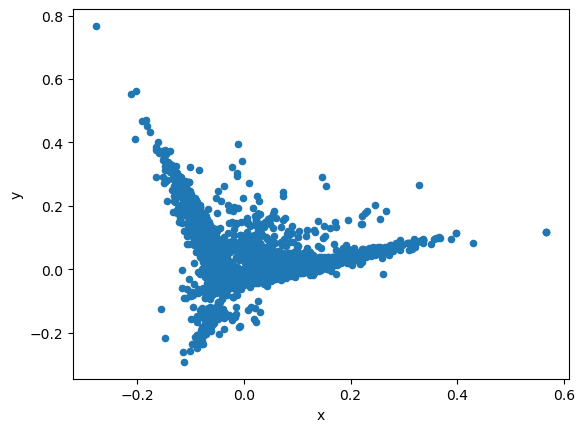

In [22]:
# VISUALIZING OUR TF-IDF VECTOR IN 2-D USING PCA

from sklearn.decomposition import PCA
%matplotlib inline

pca = PCA(n_components=2)

df2d = pd.DataFrame(pca.fit_transform(Text_tf), columns=list('xy'))

print('\n', "Our TF-IDF Vector in 2-D Looks like:",'\n')
df2d.plot(kind='scatter', x='x', y='y')
plt.show()

In [23]:
# SPLITTING OUR VECTORIZED ARRAY TO TRAINING AND TESTING USING THE 80-20 RULE

x_train = Text_tf[:8000]
x_test = Text_tf[8000:]

In [24]:
# SPLITTING OUR DEPENDENT VARIABLE INTO TRAINING AND TESTING

y_train = data["Category"].iloc[:8000]
y_test = data["Category"].iloc[8000:]